In [ ]:
import cv2
import matplotlib.pyplot as plt
import skimage
import skimage.color as skic
import skimage.filters as skif
import skimage.data as skid
import skimage.util as sku
import numpy as np
%matplotlib inline

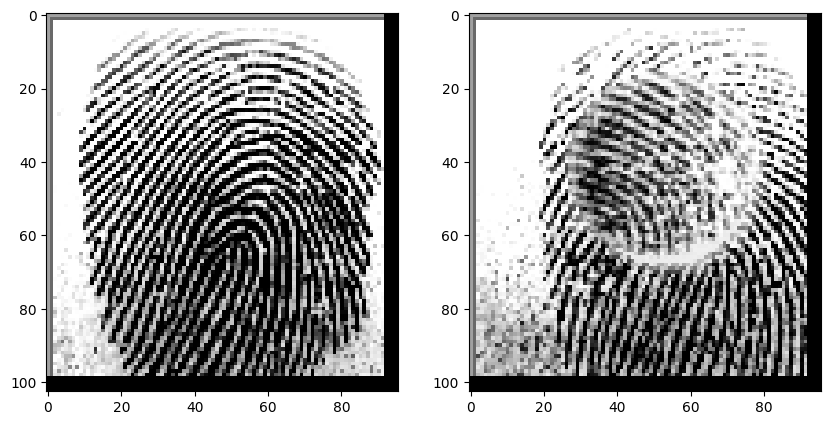

In [ ]:
img_path_1 = '/content/drive/MyDrive/ST1_Capstone/SOCOFing/Real/100__M_Left_index_finger.BMP'
img_1 = cv2.imread(img_path_1)
img_path_2 = '/content/drive/MyDrive/ST1_Capstone/SOCOFing/Altered/Altered-Medium/10__M_Left_index_finger_CR.BMP'
img_2 = cv2.imread(img_path_2)
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(img_1)
plt.subplot(122)
plt.imshow(img_2);

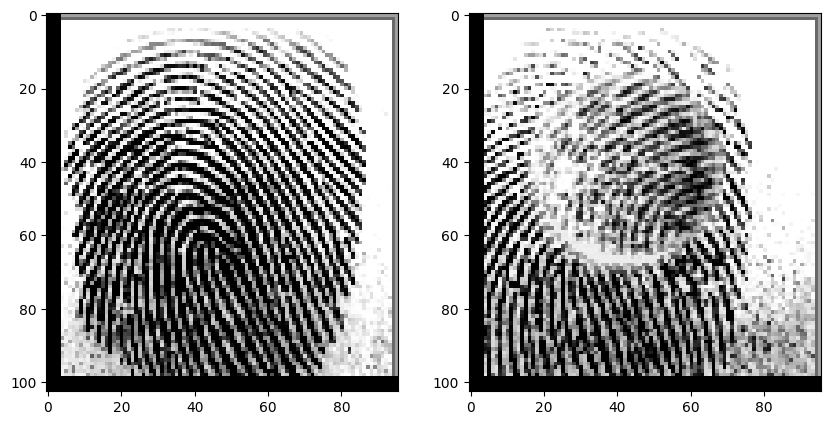

In [ ]:
#horizontal flip
flip_img_1=cv2.flip(img_1,1) # horizontal flip
flip_img_2=cv2.flip(img_2,1) # horizontal flip

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(flip_img_1)
plt.subplot(122)
plt.imshow(flip_img_2)

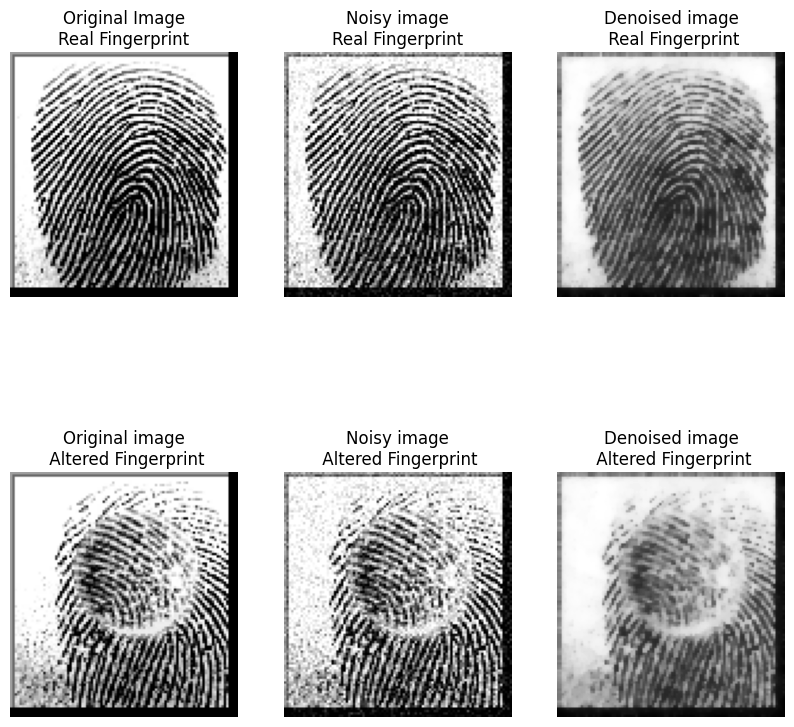

In [ ]:
# We add Gaussian noise and denoise using denoise_tv_bregman approach
#for img_1 and img_2
img_1_n = sku.random_noise(skic.rgb2gray(img_1))
img_1_d = skimage.restoration.denoise_tv_bregman(img_1_n, 5.)

img_2_n = sku.random_noise(skic.rgb2gray(img_2))
img_2_d = skimage.restoration.denoise_tv_bregman(img_2_n, 5.)


fig, ((ax1, ax2,ax3), (ax4, ax5,ax6)) = plt.subplots(ncols=3,nrows=2,figsize=(10, 10))

ax1.imshow(img_1)
ax1.set_title('Original Image\nReal Fingerprint')
ax1.set_axis_off()

ax2.imshow(img_1_n, cmap ='gray')
ax2.set_title('Noisy image\nReal Fingerprint')
ax2.set_axis_off()

ax3.imshow(img_1_d, cmap = 'gray')
ax3.set_title('Denoised image\n Real Fingerprint')
ax3.set_axis_off()

ax4.imshow(img_2)
ax4.set_title('Original image\n Altered Fingerprint')
ax4.set_axis_off()

ax5.imshow(img_2_n, cmap ='gray')
ax5.set_title('Noisy image\n Altered Fingerprint')
ax5.set_axis_off()

ax6.imshow(img_2_d, cmap = 'gray')
ax6.set_title('Denoised image\n Altered Fingerprint')
ax6.set_axis_off()

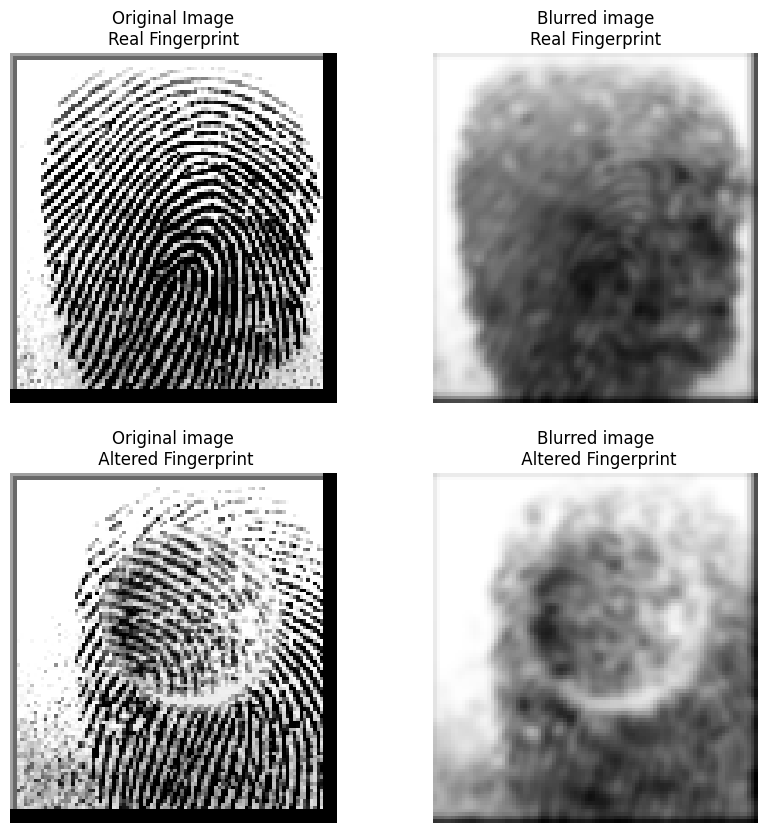

In [ ]:
d=3
img_1_blur3 = cv2.GaussianBlur(skic.rgb2gray(img_1), (2*d+1, 2*d+1), -1)[d:-d,d:-d]
img_2_blur3 = cv2.GaussianBlur(skic.rgb2gray(img_2), (2*d+1, 2*d+1), -1)[d:-d,d:-d]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2,nrows=2,figsize=(10, 10))

ax1.imshow(img_1)
ax1.set_title('Original Image\nReal Fingerprint')
ax1.set_axis_off()

ax2.imshow(img_1_blur3, cmap ='gray')
ax2.set_title('Blurred image\nReal Fingerprint')
ax2.set_axis_off()

ax3.imshow(img_2)
ax3.set_title('Original image\n Altered Fingerprint')
ax3.set_axis_off()

ax4.imshow(img_2_blur3, cmap = 'gray')
ax4.set_title('Blurred image\n Altered Fingerprint')
ax4.set_axis_off()

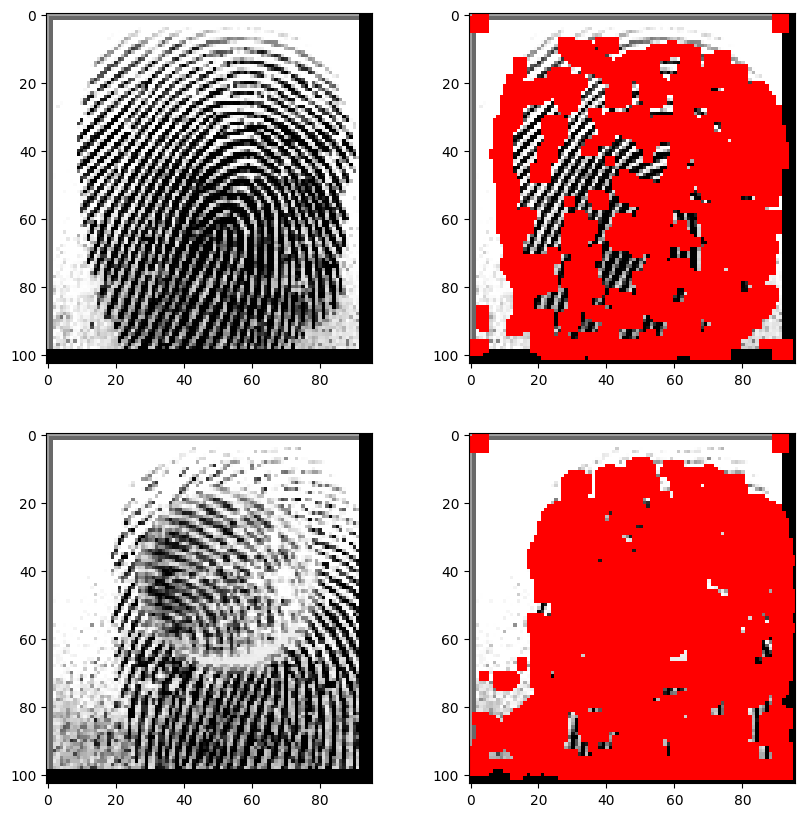

In [ ]:
#detecting corners for  image_1
harris_1=img_1.copy()
#greyscale it
gray = cv2.cvtColor(harris_1,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
blocksize=4 #
kernel_size=3 # sobel kernel: must be odd and fairly small
# run the harris corner detector
dst = cv2.cornerHarris(gray,blocksize,kernel_size,0.05) # parameters are blocksize, Sobel parameter and Harris threshold
#result is dilated for marking the corners, this is visualisation related and just makes them bigger
dst = cv2.dilate(dst,None)
#we then plot these on the input image for visualisation purposes, using bright red
harris_1[dst>0.01*dst.max()]=[0,0,255]

#detecting corners for image_2
harris_2=img_2.copy()
#greyscale it
gray = cv2.cvtColor(harris_2,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
blocksize=4 #
kernel_size=3 # sobel kernel: must be odd and fairly small
# run the harris corner detector
dst = cv2.cornerHarris(gray,blocksize,kernel_size,0.05) # parameters are blocksize, Sobel parameter and Harris threshold
#result is dilated for marking the corners, this is visualisation related and just makes them bigger
dst = cv2.dilate(dst,None)
#we then plot these on the input image for visualisation purposes, using bright red
harris_2[dst>0.01*dst.max()]=[0,0,255]

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))
plt.subplot(222)
plt.imshow(cv2.cvtColor(harris_1, cv2.COLOR_BGR2RGB))
plt.subplot(223)
plt.imshow(cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB))
plt.subplot(224)
plt.imshow(cv2.cvtColor(harris_2, cv2.COLOR_BGR2RGB))



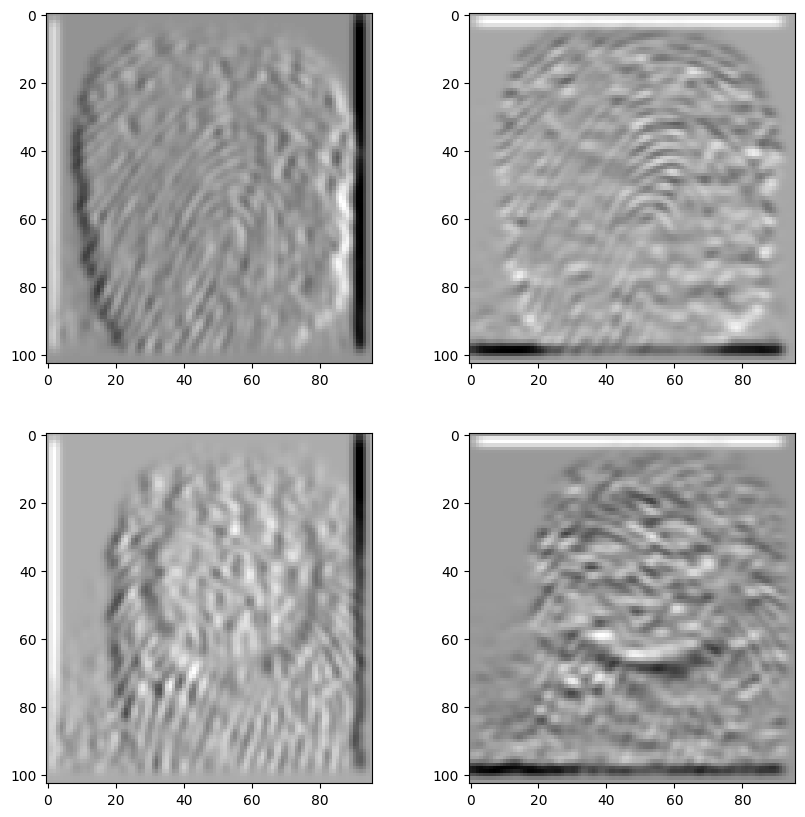

In [ ]:
#Sobel edge detector
#edge detector works on gray scale images
sobel_img_1=cv2.cvtColor(img_1,cv2.COLOR_BGR2GRAY)
sobel_img_2=cv2.cvtColor(img_2,cv2.COLOR_BGR2GRAY)

sobelx_img_1 = cv2.Sobel(sobel_img_1,cv2.CV_64F,1,0,ksize=9)
sobely_img_1 = cv2.Sobel(sobel_img_1,cv2.CV_64F,0,1,ksize=9)

sobelx_img_2 = cv2.Sobel(sobel_img_2,cv2.CV_64F,1,0,ksize=9)
sobely_img_2 = cv2.Sobel(sobel_img_2,cv2.CV_64F,0,1,ksize=9)

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(sobelx_img_1, cmap = 'gray')
plt.subplot(222)
plt.imshow(sobely_img_1, cmap = 'gray')
plt.subplot(223)
plt.imshow(sobelx_img_2, cmap = 'gray')
plt.subplot(224)
plt.imshow(sobely_img_2, cmap = 'gray')